In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Random points')

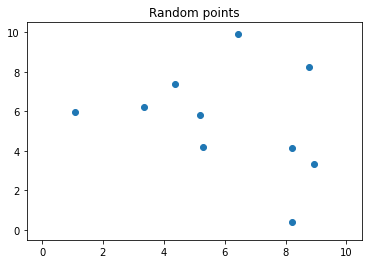

In [2]:
# Generate random points
n = 10
np.random.seed(6)
points = np.random.rand(n, 2) * 10
plt.scatter(points[:, 0], points[:, 1])
plt.xlim([-0.5, 10.5])
plt.ylim([-0.5, 10.5])
plt.title('Random points')

# Grahman scan

A nice property of convex hulls is that given a pair of points $p_0$ and $p_1$ all the remaining points in the convex hull are either on the left or right of the line spanned by these two points. In other words:

$$ p_1 - p_0 \times p - p_0 \quad \textrm{is either positive or negative} \quad \forall p \in convex$$

We can use this property to build the convex hull iteratively.

In [3]:
def orientation_test(p_0, p_1, p_2):
    '''Return > 0 if clockwise, <0 if counterclockwise and 0 if co-linear.'''
    
    return np.cross(p_1 - p_0, p_2 - p_0)

Then to compute the Convex hull we first get the anchor point i.e. the point with the lowest y-coordinate. Then we sort the points on the polar coordinates of this point.

Then, we start from the first (sorted) pair of points and check the wheter the cross product of the segments $\bar{p_0p_1}$ $\bar{p_0p_2}$ is positive (or negative?). It should be clear that if p_2 belongs to the conve hull then this product should be negative.

In [4]:
'''Sort points by polar angle'''

anchor_point = points[0]
for p in points[1:]:
    if p[1] < anchor_point[1]:
        anchor_point = p
    elif p[1] == anchor_point[1] and p[0] < anchor_point[0]:
        anchor_point = p

# sort the points by polar coordinate
from math import atan2

def polar_angle(p0, p1):
    y_span=p1[1]-p0[1]
    x_span=p1[0]-p0[0]
    return atan2(y_span,x_span)

points_angles = []
origin = [0,0]
for p in points:
    angle = polar_angle(anchor_point, p)
    points_angles.append(angle)

points_angles = np.array(points_angles)
index = points_angles.argsort()    
print(points_angles[index])
sorted_points = points[index]

[0.         1.32886695 1.50053607 1.57448651 1.75413216 2.07506036
 2.08465405 2.22869815 2.26736306 2.48198778]


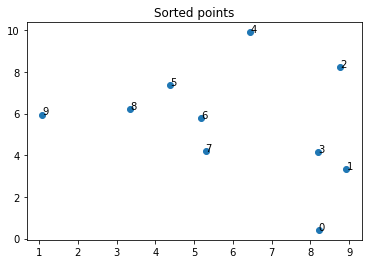

In [5]:
'''Plot sorted points'''
fig, ax = plt.subplots()
ax.scatter(points[:,0], points[:,1])
for idx, p in enumerate(sorted_points):
    ax.annotate(idx, p)
ax.title.set_text('Sorted points')

However we note that we can simplify the sort process. Consider sorting the points by using as anchor point the point $p=(-\inf, y)$. This is the same as sorting the points by their x coordinate.

In [6]:
# Init the list representng the convex hull with the first 2 points
ch = list( [ sorted_points[0], sorted_points[1] ] )
for p in sorted_points[2:]:
    while len(ch)>=2 and orientation_test(ch[-2], ch[-1], p) <= 0:
        ch.pop()
    ch.append(p)

ch = np.array(ch) # convert back to numpy array 
# print('The resulting convex hull is: \n', ch)
print('The convex hull containts {} vertices.'.format(len(ch)))


The convex hull containts 5 vertices.


Text(0.5, 1.0, 'Convex hull')

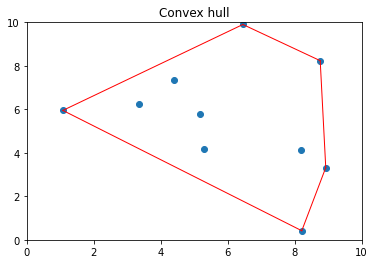

In [7]:
# Plot convex hull
for i in range(len(ch)):
    if i == len(ch)-1:
        xx = [ch[i][0], ch[0][0]]
        yy = [ch[i][1], ch[0][1]]
    else:
        xx = [ch[i][0], ch[i+1][0]]
        yy = [ch[i][1], ch[i+1][1]]
    plt.plot(xx, yy, 'r', lw=1)

plt.scatter(points[:, 0], points[:, 1], zorder=0)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Convex hull')

However we note that we can simplify the sort process. Consider sorting the points by using as anchor point the point $p=(-\inf, y)$, sorting the points using this anchor point $p$ is the same as sorting the points by their x coordinate. This modification of the algorithm is called Andrew's monotone chain convex hull algorithm. However, note that since $p$ is not necessarely the bottom left most point and that the ordering of the points is different compared to (TODO how to quote a previous section?) the original Grahman scan algorithm. We need first to compute the bottom convex hull, then flip the points and compute the top one due to this.

In [10]:
def sort_by_x_axis(points: np.array):
    '''Sort by x-coordinate'''
    tmp = points[points[:, 1].argsort()]
    return tmp[tmp[:, 0].argsort()]

sorted_points = sort_by_x_axis(points)

# lower convex hull
lower = []
for p in sorted_points:
    while len(lower)>=2 and orientation_test(lower[-2], lower[-1], p) <= 0:
        lower.pop()
    lower.append(p)

# upper convex hull
inverse_points = sorted_points[::-1] # reverse points
upper = []
for p in inverse_points:
    while len(upper)>=2 and orientation_test(upper[-2], upper[-1], p) <= 0:
        upper.pop()
    upper.append(p)

# Join the two convex hulls but remove the last point of each (they are duplicates)
ch = np.array(lower[:-1] + upper[:-1]) # convert back to numpy array 

# print('The resulting convex hull is: \n', lower)
print('The convex hull containts {} vertices.'.format(len(ch)))


The convex hull containts 5 vertices.


You can visualise the convex hull by (TODO how to ref) running again cell.

# Complexity analysis of Grahman Scan

Good! How long does it take to compute the convex hull?

1. Sorting the points: $\mathcal{O}(nlogn)$
2. iterate through the points: $\mathcal{O}(n)$ 
    1. Perform the orientation test $\mathcal{O}(1)$

Therefore the total complexity is $\mathcal{O}(nlogn)$.

Can we do better than $\mathcal{O}(nlogn)$? As instance, can we solve the problem in $\mathcal{O}(n)$?

Short answer: No, you can't.

Long answer: if you could solve the problem of computing a convex hull in $\mathcal{O}(n)$ you would contradict  (FORGOT NAME THEOREM)


TODO check this and update regardig $\Omega(n)$

Text(0.5, 1.0, 'Result of the mapping.')

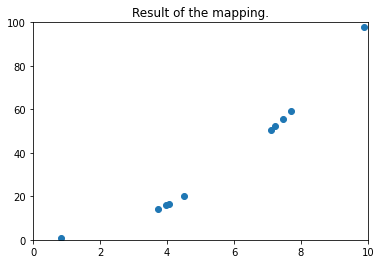

In [16]:
# Generate n random points to sort in interval [0, 10]
n = 10
random_points = [np.random.rand()*10 for i in range(n)]

def mapping(x):
    '''we map the points R->R^2'''
    return [x, x**2]

points = np.array( [mapping(x) for x in random_points])

plt.scatter(points[:, 0], points[:, 1])
plt.xlim([0, 10])
plt.ylim([0, 100])
plt.title('Result of the mapping.')

In [19]:
# Compute convex hull
def sort_by_x_axis(points: np.array):
    '''Sort by x-coordinate'''
    tmp = points[points[:, 1].argsort()]
    return tmp[tmp[:, 0].argsort()]

sorted_points = sort_by_x_axis(points)

# lower convex hull
lower = []
for p in sorted_points:
    while len(lower)>=2 and orientation_test(lower[-2], lower[-1], p) <= 0:
        lower.pop()
    lower.append(p)

# upper convex hull
inverse_points = sorted_points[::-1] # reverse points
upper = []
for p in inverse_points:
    while len(upper)>=2 and orientation_test(upper[-2], upper[-1], p) <= 0:
        upper.pop()
    upper.append(p)

# Join the two convex hulls but remove the last point of each (they are duplicates)
ch = np.array(lower[:-1] + upper[:-1]) # convert back to numpy array 

# print('The resulting convex hull is: \n', lower)
print('The convex hull containts {} vertices.'.format(len(ch)))


The convex hull containts 10 vertices.


[0.82458553 3.73808434 3.98372919 4.06107796 4.50499281 7.09628606
 7.24070567 7.46510717 7.70880966 9.89379848]
[0.82458553 3.73808434 3.98372919 4.06107796 4.50499281 7.09628606
 7.24070567 7.46510717 7.70880966 9.89379848]
True


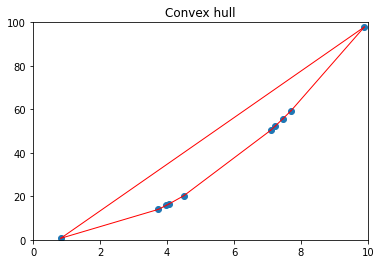

In [20]:
# plot convex hull
for i in range(len(ch)):
    if i == len(ch)-1:
        xx = [ch[i][0], ch[0][0]]
        yy = [ch[i][1], ch[0][1]]
    else:
        xx = [ch[i][0], ch[i+1][0]]
        yy = [ch[i][1], ch[i+1][1]]
    plt.plot(xx, yy, 'r', lw=1)

plt.scatter(points[:, 0], points[:, 1], zorder=0)
plt.xlim([0, 10])
plt.ylim([0, 100])
plt.title('Convex hull')

# Let's check that the ordering is correct
print(np.sort(random_points))
print(ch[:,0])
# Yes! The convex hull contains the sorted array in the first dimension!
print(np.all(np.sort(random_points) == ch[:,0] ))

We built the mapping $\phi: R -> R^2$ and showed that we can reduce a sorting problem to a Convex hull computation problem. If we could solve the Convex hull problem in better time than $\mathcal{O}(nlogn)$ then we could solve the sorting problem with this better complexity as well, contradicting the sorting problem lower bound theorem. Therefore we proved by contraddiction that we can't solve the Convex hull problem in better time complexity than $\mathcal{O}(nlogn)$.

# Quick hull

#TODO and lower/upper tangengts computations
